In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
supplierData = pd.read_csv('/content/drive/My Drive/cmpe256-data/uw-supplier-data-2.csv',low_memory=False)
supplierData

,Supplier Name,Stage Invoked,Mandatory Restrictions,Reporting Month,REPORTED Total Monthly Potable Water,REPORTED Total Monthly Potable Water Production 2013,REPORTED Monthly CII,REPORTED Monthly Ag Use,REPORTED Monthly Ag Use 2013,REPORTED Recycled Water,REPORTED Units,Total Population Served,REPORTED Residential Gallons,Supplier has Agricultural Water,CALCULATED Total Monthly Potable Water Production,CALCULATED Total Monthly Potable Water Production 2013 Gallons,CALCULATED Monthly CII Reporting Month,CALCULATED R-GPCD Reporting Month,% Residential Use,Hydrologic Region,Water Days Allowed/Week,Follow-up Actions,Warnings Issued,Rate Penalties Assessed,Penalties Assessed
0,East Bay Municipal Utilities District,0,No,9/15/2019,5916.800,6528.400,1171,NaN,NaN,NaN,MG,"1,440,000",84.00,No,"5,916,800,000","6,528,400,000","1,171,000,000",83.5,61,San Francisco Bay,7,0,0,0,0
1,East Bay Municipal Utilities District,0,No,8/15/2019,6459.200,7172.300,1362.2,NaN,NaN,NaN,MG,"1,440,000",88.00,No,"6,459,200,000","7,172,300,000","1,362,200,000",88.3,61,San Francisco Bay,7,0,0,0,0
2,East Bay Municipal Utilities District,0,No,7/15/2019,6317.400,7452.200,1172,NaN,NaN,NaN,MG,"1,440,000",85.00,No,"6,317,400,000","7,452,200,000","1,172,000,000",84.9,60,San Francisco Bay,7,0,0,0,0
3,East Bay Municipal Utilities District,0,No,6/15/2019,5880.600,6927.500,901,NaN,NaN,NaN,MG,"1,440,000",82.00,No,"5,880,600,000","6,927,500,000","901,000,000",83.0,61,San Francisco Bay,7,0,0,0,0
4,East Bay Municipal Utilities District,0,No,5/15/2019,5203.600,6716.500,819,NaN,NaN,NaN,MG,"1,440,000",70.00,No,"5,203,600,000","6,716,500,000","819,000,000",69.9,60,San Francisco Bay,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25205,Cloverdale,Voluntary,No,10/15/2016,27.378,51.337,10.51,NaN,NaN,NaN,MG,"8,825",75.49,No,"27,378,000","51,337,000","10,510,000",66.0,66,North Coast,6,0,0,0,0
25206,Cloverdale,Voluntary,No,9/15/2016,39.363,57.805,13.61,0,0,0,MG,"8,825",119.68,No,"39,363,000","57,805,000","13,610,000",104.1,70,North Coast,6,0,0,0,0
25207,Cloverdale,Voluntary,No,8/15/2016,41.757,62.218,11.17,0,0,0,MG,"8,825",87.95,No,"41,757,000","62,218,000","11,170,000",103.8,68,North Coast,6,0,0,0,0
25208,Cloverdale,Voluntary,No,7/15/2016,44.477,61.698,11.05,0,0,0,MG,"8,825",98.47,No,"44,477,000","61,698,000","11,050,000",115.4,71,North Coast,6,0,0,0,0


In [5]:
supplierData.columns

Index(['Supplier Name', 'Stage Invoked', 'Mandatory Restrictions',
       'Reporting Month', 'REPORTED Total Monthly Potable Water',
       'REPORTED Total Monthly Potable Water Production 2013',
       'REPORTED Monthly CII', 'REPORTED Monthly Ag Use',
       'REPORTED Monthly Ag Use 2013', 'REPORTED Recycled Water',
       'REPORTED Units', 'Total Population Served',
       'REPORTED Residential Gallons', 'Supplier has Agricultural Water',
       'CALCULATED Total Monthly Potable Water Production',
       'CALCULATED Total Monthly Potable Water Production 2013 Gallons',
       'CALCULATED Monthly CII Reporting Month',
       'CALCULATED R-GPCD Reporting Month', '% Residential Use',
       'Hydrologic Region', 'Water Days Allowed/Week', 'Follow-up Actions',
       'Warnings Issued', 'Rate Penalties Assessed ', 'Penalties Assessed'],
      dtype='object')

In [0]:
supplierData['YearMonth'] = pd.to_datetime(supplierData['Reporting Month'],format='%m/%d/%Y')
supplierData['ReportingYear'] = pd.to_datetime(supplierData['Reporting Month'],format='%m/%d/%Y').dt.year
supplierData['ReportingMonth'] = pd.to_datetime(supplierData['Reporting Month'],format='%m/%d/%Y').dt.month

In [7]:
supplierData['ReportingMonth'].head(12)

0      9
1      8
2      7
3      6
4      5
5      4
6      3
7      2
8      1
9     12
10    11
11    10
Name: ReportingMonth, dtype: int64

In [8]:
supplierData.head()

,Supplier Name,Stage Invoked,Mandatory Restrictions,Reporting Month,REPORTED Total Monthly Potable Water,REPORTED Total Monthly Potable Water Production 2013,REPORTED Monthly CII,REPORTED Monthly Ag Use,REPORTED Monthly Ag Use 2013,REPORTED Recycled Water,REPORTED Units,Total Population Served,REPORTED Residential Gallons,Supplier has Agricultural Water,CALCULATED Total Monthly Potable Water Production,CALCULATED Total Monthly Potable Water Production 2013 Gallons,CALCULATED Monthly CII Reporting Month,CALCULATED R-GPCD Reporting Month,% Residential Use,Hydrologic Region,Water Days Allowed/Week,Follow-up Actions,Warnings Issued,Rate Penalties Assessed,Penalties Assessed,YearMonth,ReportingYear,ReportingMonth
0,East Bay Municipal Utilities District,0,No,9/15/2019,5916.8,6528.4,1171,NaN,NaN,NaN,MG,"1,440,000",84.0,No,"5,916,800,000","6,528,400,000","1,171,000,000",83.5,61,San Francisco Bay,7,0,0,0,0,2019-09-15,2019,9
1,East Bay Municipal Utilities District,0,No,8/15/2019,6459.2,7172.3,1362.2,NaN,NaN,NaN,MG,"1,440,000",88.0,No,"6,459,200,000","7,172,300,000","1,362,200,000",88.3,61,San Francisco Bay,7,0,0,0,0,2019-08-15,2019,8
2,East Bay Municipal Utilities District,0,No,7/15/2019,6317.4,7452.2,1172,NaN,NaN,NaN,MG,"1,440,000",85.0,No,"6,317,400,000","7,452,200,000","1,172,000,000",84.9,60,San Francisco Bay,7,0,0,0,0,2019-07-15,2019,7
3,East Bay Municipal Utilities District,0,No,6/15/2019,5880.6,6927.5,901,NaN,NaN,NaN,MG,"1,440,000",82.0,No,"5,880,600,000","6,927,500,000","901,000,000",83.0,61,San Francisco Bay,7,0,0,0,0,2019-06-15,2019,6
4,East Bay Municipal Utilities District,0,No,5/15/2019,5203.6,6716.5,819,NaN,NaN,NaN,MG,"1,440,000",70.0,No,"5,203,600,000","6,716,500,000","819,000,000",69.9,60,San Francisco Bay,7,0,0,0,0,2019-05-15,2019,5


In [9]:
supplierData.dtypes

Supplier Name                                                             object
Stage Invoked                                                             object
Mandatory Restrictions                                                    object
Reporting Month                                                           object
REPORTED Total Monthly Potable Water                                     float64
REPORTED Total Monthly Potable Water Production 2013                     float64
REPORTED Monthly CII                                                      object
REPORTED Monthly Ag Use                                                   object
REPORTED Monthly Ag Use 2013                                              object
REPORTED Recycled Water                                                   object
REPORTED Units                                                            object
Total Population Served                                                   object
REPORTED Residential Gallons

In [10]:
supplierData['Total Population Served'] = supplierData['Total Population Served'].apply(lambda x: x.replace(',',''))
supplierData['Total Population Served']

0        1440000
1        1440000
2        1440000
3        1440000
4        1440000
          ...   
25205       8825
25206       8825
25207       8825
25208       8825
25209       8825
Name: Total Population Served, Length: 25210, dtype: object

In [0]:
supplierData['CALCULATED Total Monthly Potable Water Production'] = supplierData['CALCULATED Total Monthly Potable Water Production'].apply(lambda x:x.replace(',','')) 
supplierData['CALCULATED Total Monthly Potable Water Production 2013 Gallons'] = supplierData['CALCULATED Total Monthly Potable Water Production 2013 Gallons'].apply(lambda x:x.replace(',','')) 
supplierData['CALCULATED Monthly CII Reporting Month'] = supplierData['CALCULATED Monthly CII Reporting Month'].apply(lambda x:x.replace(',','')) 
#supplierData['CALCULATED R-GPCD Reporting Month'] = supplierData['CALCULATED R-GPCD Reporting Month'].apply(lambda x:x.replace(',','')) 

In [12]:
supplierData.head()

,Supplier Name,Stage Invoked,Mandatory Restrictions,Reporting Month,REPORTED Total Monthly Potable Water,REPORTED Total Monthly Potable Water Production 2013,REPORTED Monthly CII,REPORTED Monthly Ag Use,REPORTED Monthly Ag Use 2013,REPORTED Recycled Water,REPORTED Units,Total Population Served,REPORTED Residential Gallons,Supplier has Agricultural Water,CALCULATED Total Monthly Potable Water Production,CALCULATED Total Monthly Potable Water Production 2013 Gallons,CALCULATED Monthly CII Reporting Month,CALCULATED R-GPCD Reporting Month,% Residential Use,Hydrologic Region,Water Days Allowed/Week,Follow-up Actions,Warnings Issued,Rate Penalties Assessed,Penalties Assessed,YearMonth,ReportingYear,ReportingMonth
0,East Bay Municipal Utilities District,0,No,9/15/2019,5916.8,6528.4,1171,NaN,NaN,NaN,MG,1440000,84.0,No,5916800000,6528400000,1171000000,83.5,61,San Francisco Bay,7,0,0,0,0,2019-09-15,2019,9
1,East Bay Municipal Utilities District,0,No,8/15/2019,6459.2,7172.3,1362.2,NaN,NaN,NaN,MG,1440000,88.0,No,6459200000,7172300000,1362200000,88.3,61,San Francisco Bay,7,0,0,0,0,2019-08-15,2019,8
2,East Bay Municipal Utilities District,0,No,7/15/2019,6317.4,7452.2,1172,NaN,NaN,NaN,MG,1440000,85.0,No,6317400000,7452200000,1172000000,84.9,60,San Francisco Bay,7,0,0,0,0,2019-07-15,2019,7
3,East Bay Municipal Utilities District,0,No,6/15/2019,5880.6,6927.5,901,NaN,NaN,NaN,MG,1440000,82.0,No,5880600000,6927500000,901000000,83.0,61,San Francisco Bay,7,0,0,0,0,2019-06-15,2019,6
4,East Bay Municipal Utilities District,0,No,5/15/2019,5203.6,6716.5,819,NaN,NaN,NaN,MG,1440000,70.0,No,5203600000,6716500000,819000000,69.9,60,San Francisco Bay,7,0,0,0,0,2019-05-15,2019,5


In [13]:
supplierData.dtypes

Supplier Name                                                             object
Stage Invoked                                                             object
Mandatory Restrictions                                                    object
Reporting Month                                                           object
REPORTED Total Monthly Potable Water                                     float64
REPORTED Total Monthly Potable Water Production 2013                     float64
REPORTED Monthly CII                                                      object
REPORTED Monthly Ag Use                                                   object
REPORTED Monthly Ag Use 2013                                              object
REPORTED Recycled Water                                                   object
REPORTED Units                                                            object
Total Population Served                                                   object
REPORTED Residential Gallons

In [13]:
supplierData['REPORTED Monthly Ag Use'].fillna(0)

0        0
1        0
2        0
3        0
4        0
        ..
25205    0
25206    0
25207    0
25208    0
25209    0
Name: REPORTED Monthly Ag Use, Length: 25210, dtype: object

In [0]:
supplierData['REPORTED Monthly Ag Use'] = supplierData['REPORTED Monthly Ag Use'].apply(lambda x : float(x) if (x != 'na' and x != 'not avail.') else 0)


In [10]:
supplierData['REPORTED Monthly Ag Use'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: REPORTED Monthly Ag Use, dtype: float64

In [15]:
supplierData['REPORTED Recycled Water'].fillna(0)

0        0
1        0
2        0
3        0
4        0
        ..
25205    0
25206    0
25207    0
25208    0
25209    0
Name: REPORTED Recycled Water, Length: 25210, dtype: object

In [16]:
supplierData.dtypes

Supplier Name                                                             object
Stage Invoked                                                             object
Mandatory Restrictions                                                    object
Reporting Month                                                           object
REPORTED Total Monthly Potable Water                                     float64
REPORTED Total Monthly Potable Water Production 2013                     float64
REPORTED Monthly CII                                                      object
REPORTED Monthly Ag Use                                                  float64
REPORTED Monthly Ag Use 2013                                              object
REPORTED Recycled Water                                                   object
REPORTED Units                                                            object
Total Population Served                                                   object
REPORTED Residential Gallons

In [0]:
supplierData['REPORTED Recycled Water']= supplierData['REPORTED Recycled Water'].apply(lambda x : float(x) if x != 'na' else 0)
#supplierData['Hydrologic Region']= supplierData['Hydrologic Region'].apply(lambda x : float(x) if x != 'na' else 0)
#supplierData['Water Days Allowed/Week']= supplierData['Water Days Allowed/Week'].apply(lambda x : float(x) if x != 'na' else 0)
supplierData['CALCULATED Total Monthly Potable Water Production']= supplierData['CALCULATED Total Monthly Potable Water Production'].apply(lambda x : float(x) if x != ' Null ' else 0)
supplierData['CALCULATED Total Monthly Potable Water Production 2013 Gallons']= supplierData['CALCULATED Total Monthly Potable Water Production 2013 Gallons'].apply(lambda x : float(x) if x != ' Null ' else 0)
supplierData['CALCULATED Monthly CII Reporting Month']= supplierData['CALCULATED Monthly CII Reporting Month'].apply(lambda x : float(x) if x != ' Null ' else 0)
#supplierData['Supplier has Agricultural Water']= supplierData['Supplier has Agricultural Water'].apply(lambda x : float(x) if x != ' No ' else 0)
supplierData['REPORTED Monthly CII']= supplierData['REPORTED Monthly CII'].apply(lambda x : float(x) if (x != 'na' and x != 'uk' and x != 'not avail.') else 0)
supplierData['REPORTED Monthly Ag Use']= supplierData['REPORTED Monthly Ag Use'].apply(lambda x : float(x) if (x != 'na' and x != 'not avail.') else 0)
supplierData['REPORTED Monthly Ag Use 2013']= supplierData['REPORTED Monthly Ag Use 2013'].apply(lambda x : float(x) if x != 'na' else 0)
supplierData['Total Population Served'] = supplierData['Total Population Served'].apply(lambda x : float(x) if x != 'na' else 0)

In [0]:
supplierData['REPORTED Recycled Water'].unique()

array([      nan, 0.000e+00, 5.021e+02, ..., 8.280e-01, 1.620e-01,
       9.867e+00])

In [18]:
supplierData['Hydrologic Region Codes'] = supplierData['Hydrologic Region'].astype('category').cat.codes
supplierData['Hydrologic Region Codes'].unique()

array([5, 0, 7, 6, 4, 1, 2, 9, 8, 3])

In [19]:
supplierData['Water Days Allowed/Week'] = supplierData['Water Days Allowed/Week'].astype('category').cat.codes
supplierData['Water Days Allowed/Week'].unique()

array([ 7, -1,  2,  3,  1,  4,  0,  5,  6,  8])

In [0]:
supplierData['Supplier has Agricultural Water'] = supplierData['Supplier has Agricultural Water'].astype('category').cat.codes

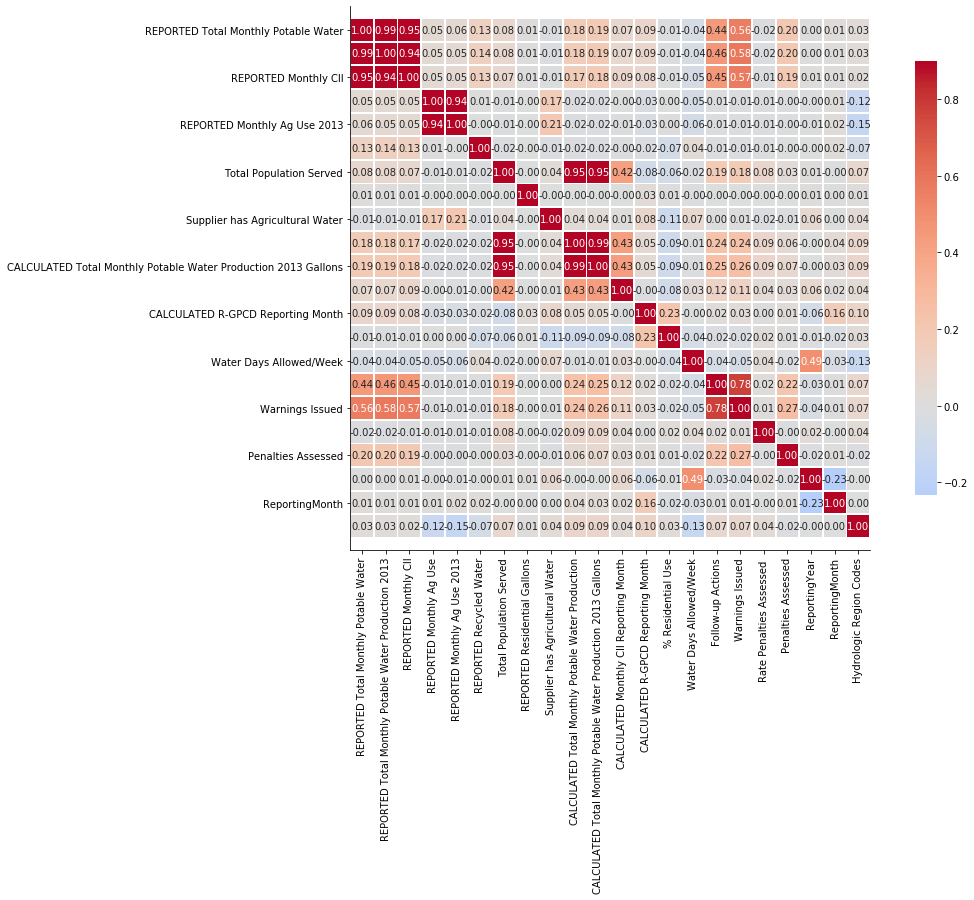

In [21]:
corr = supplierData.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

In [0]:
supplierData['REPORTED Recycled Water'] = supplierData['REPORTED Recycled Water'].fillna(0)
supplierData['REPORTED Monthly Ag Use'] = supplierData['REPORTED Monthly Ag Use'].fillna(0)

In [25]:
filter_columns=['Hydrologic Region Codes','ReportingYear', 'ReportingMonth','REPORTED Monthly Ag Use','REPORTED Recycled Water','REPORTED Total Monthly Potable Water','Total Population Served','REPORTED Residential Gallons','CALCULATED Total Monthly Potable Water Production']
filtered_water_data = supplierData[filter_columns]
filtered_water_data.head()

,Hydrologic Region Codes,ReportingYear,ReportingMonth,REPORTED Monthly Ag Use,REPORTED Recycled Water,REPORTED Total Monthly Potable Water,Total Population Served,REPORTED Residential Gallons,CALCULATED Total Monthly Potable Water Production
0,5,2019,9,0.0,0.0,5916.8,1440000.0,84.0,5.916800e+09
1,5,2019,8,0.0,0.0,6459.2,1440000.0,88.0,6.459200e+09
2,5,2019,7,0.0,0.0,6317.4,1440000.0,85.0,6.317400e+09
3,5,2019,6,0.0,0.0,5880.6,1440000.0,82.0,5.880600e+09
4,5,2019,5,0.0,0.0,5203.6,1440000.0,70.0,5.203600e+09


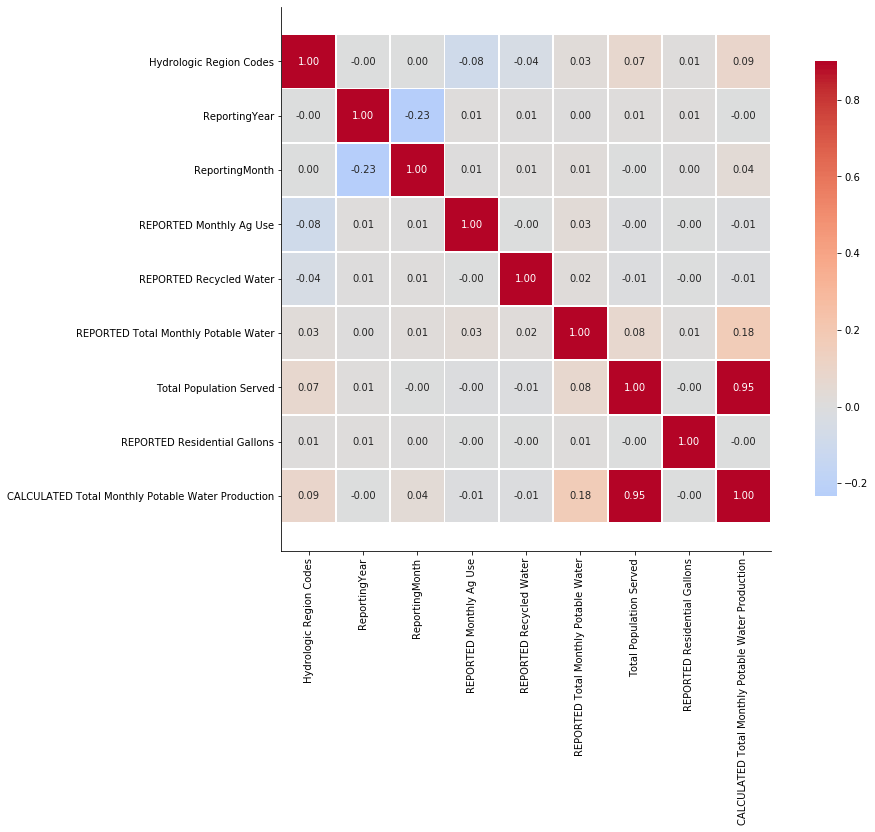

In [26]:
corr = filtered_water_data.corr()
g = sns.heatmap(corr, vmax=.9, center=0,
               square=True, linewidths=.9, cbar_kws={"shrink": .8}, annot=True, fmt='.2f', cmap='coolwarm')
bottom, top = g.get_ylim()
g.set_ylim(bottom + 0.5, top - 0.5)
sns.despine()
g.figure.set_size_inches(16, 10)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


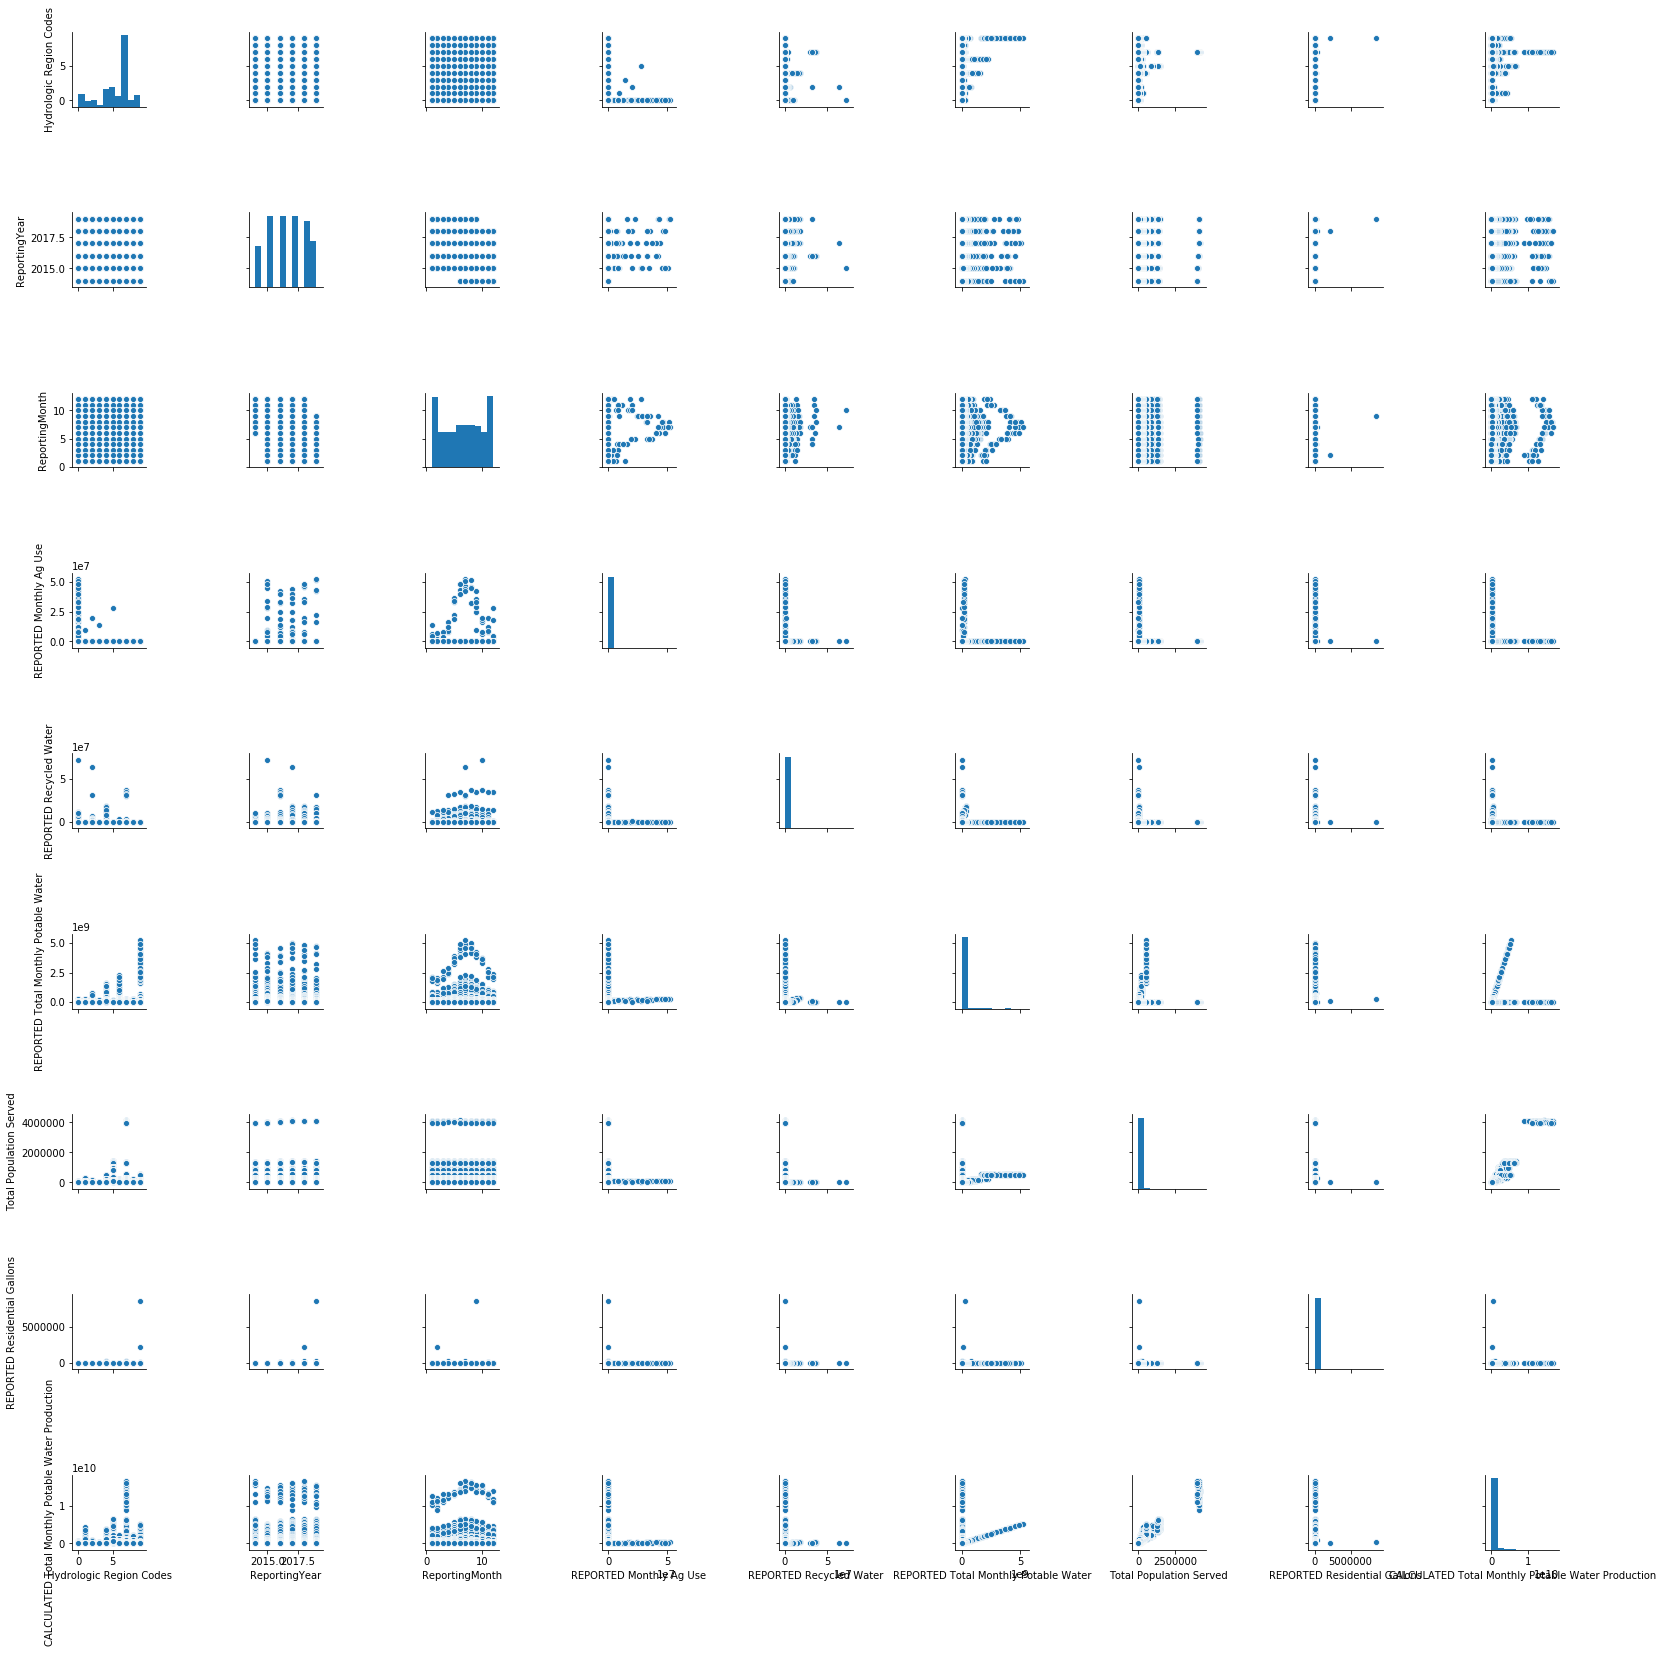

In [24]:
sns.pairplot(filtered_water_data)

In [27]:
filtered_water_data['ReportingYear'].unique()

array([2019, 2018, 2017, 2016, 2015, 2014])